In [1]:
import pandas as  pd
import numpy as  np

import seaborn as  sns
import matplotlib.pyplot as  plt

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn import datasets
from sklearn.metrics import  accuracy_score

import tensorflow as  tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import  to_categorical


2023-02-17 16:20:31.421069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
wine_data = datasets.load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
data = pd.DataFrame(data= wine_data['data'], columns= wine_data['feature_names'])
data['target'] = wine_data['target']

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data.shape

(178, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

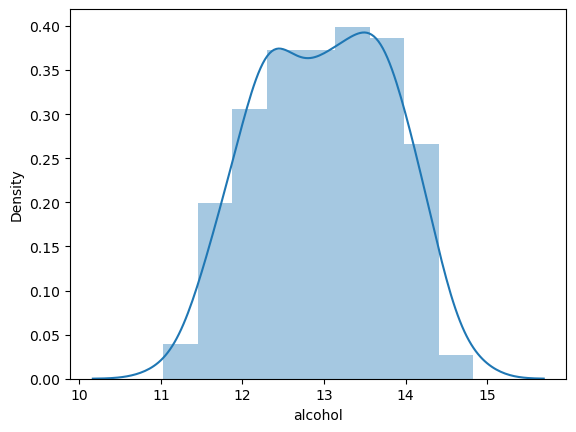

In [9]:
sns.distplot(data['alcohol'], kde=1)

/Users/sulavdahal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


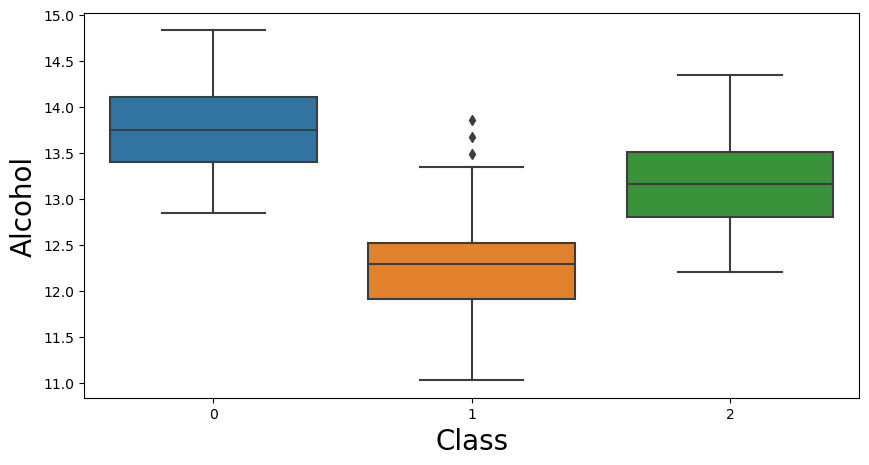

In [11]:
plt.figure(figsize=(10, 5))

sns.boxplot('target', 'alcohol', data=data)

plt.xlabel('Class', fontsize=20)
plt.ylabel('Alcohol', fontsize=20)

plt.show()

In [12]:
features = data.drop('target', axis=1)
target = data['target']


In [13]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [15]:
target.sample(5)

17     0
78     1
102    1
19     0
131    2
Name: target, dtype: int64

In [16]:
target = to_categorical(target)
target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:
standardScaler = StandardScaler() 
processed_features = pd.DataFrame(standardScaler.fit_transform(features), columns=features.columns, index=features.index)
processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.841418e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,2.444986e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.059175e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.110417e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-2.494883e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-1.955365e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.443133e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-4.178929e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.540590e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-4.129032e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [19]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [22]:
from tensorflow.keras import Model

In [23]:
class WineClassificationModel(Model):
    def __init__(self, input_shape):
        super(WineClassificationModel, self).__init__()
        self.dense1 = layers.Dense(128, activation='relu', input_shape=[input_shape])
        self.dense2 = layers.Dense(64, activation='relu')
        self.dense3 = layers.Dense(3, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x  

In [24]:
model= WineClassificationModel(X_train.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

2023-02-17 16:34:39.765843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
num_epochs = 500
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=0, batch_size=48) 


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

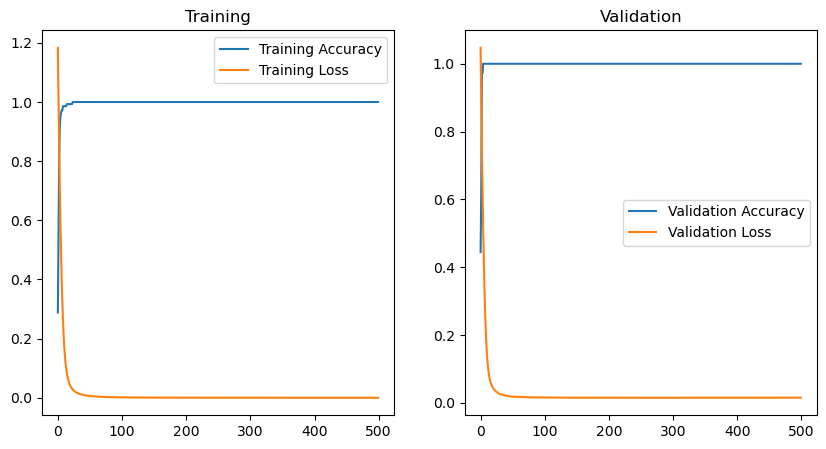

In [27]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

precision = history.history['val_accuracy']
recall = history.history['val_loss']

epoch_range = range(num_epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.plot(epoch_range, train_acc, label='Training Accuracy')
plt.plot(epoch_range, train_loss, label='Training Loss')

plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epoch_range, precision, label='Validation Accuracy')
plt.plot(epoch_range, recall, label='Validation Loss')

plt.title('Validation')
plt.legend()

In [28]:
y_pred = model.predict(X_test)

y_pred[:10]

2/2 [==============================] - 0s 2ms/step


array([[2.2645876e-05, 1.1569784e-06, 9.9997616e-01],
       [7.8292651e-08, 9.9999988e-01, 4.2314898e-08],
       [1.0000000e+00, 2.0728312e-09, 4.9078466e-08],
       [1.3407659e-06, 9.9999869e-01, 1.8909423e-09],
       [1.0000000e+00, 2.7599847e-10, 3.9721158e-08],
       [1.6993667e-05, 2.7861769e-04, 9.9970430e-01],
       [2.3181199e-05, 9.9983573e-01, 1.4107366e-04],
       [1.0000000e+00, 6.4390930e-13, 6.4691731e-11],
       [7.4199938e-06, 7.6585997e-07, 9.9999177e-01],
       [1.6336698e-07, 9.9999726e-01, 2.5848092e-06]], dtype=float32)

In [29]:
y_pred = np.where(y_pred > 0.5, 1, y_pred)
y_pred = np.where(y_pred <= 0.5, 0, y_pred)

y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [30]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [31]:
accuracy_score(y_test, y_pred)

1.0

In [32]:
import os
import datetime

In [33]:
logdir = os.path.join('seq_logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [34]:
training_history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=0, batch_size=48, callbacks=[tensorboard_callback])

In [35]:
%load_ext tensorboard
%tensorboard --logdir seq_logs --port 6050